In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
df=pd.read_csv("booking.csv")
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [23]:
print(df.shape)
display(df.columns)

(36285, 17)


Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [25]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
df['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [28]:
df['room type'].value_counts().sort_index()

room type
Room_Type 1    28138
Room_Type 2      692
Room_Type 3        7
Room_Type 4     6059
Room_Type 5      265
Room_Type 6      966
Room_Type 7      158
Name: count, dtype: int64

In [29]:
df['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [30]:
df['date of reservation']=pd.to_datetime(df['date of reservation'],errors='coerce')

In [31]:
df['total_nights']=df['number of week nights']+df['number of weekend nights']
df.drop(columns={'number of week nights','number of weekend nights'},inplace=True)

In [32]:
df['total_guest']=df['number of adults']+df['number of children']
df.head()

,Booking_ID,number of adults,number of children,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total_nights,total_guest
0,INN00001,1,1,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled,7,2
1,INN00002,1,0,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled,4,1
2,INN00003,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled,4,3
3,INN00004,1,0,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled,2,1
4,INN00005,1,0,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled,3,1


booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


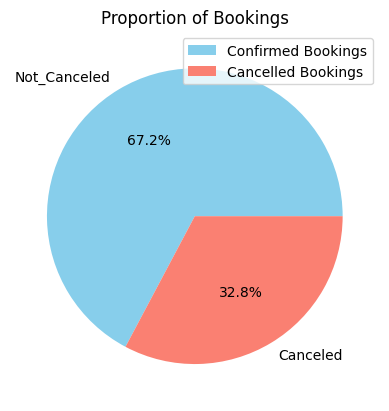

In [33]:
status_counts = df['booking status'].value_counts()
print(status_counts)
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['skyblue','salmon'])
plt.title("Proportion of Bookings")
plt.legend(['Confirmed Bookings','Cancelled Bookings'])
plt.show()

,type of meal,total_guest
0,Meal Plan 1,54583
1,Meal Plan 2,6434
2,Meal Plan 3,10
3,Not Selected,9736


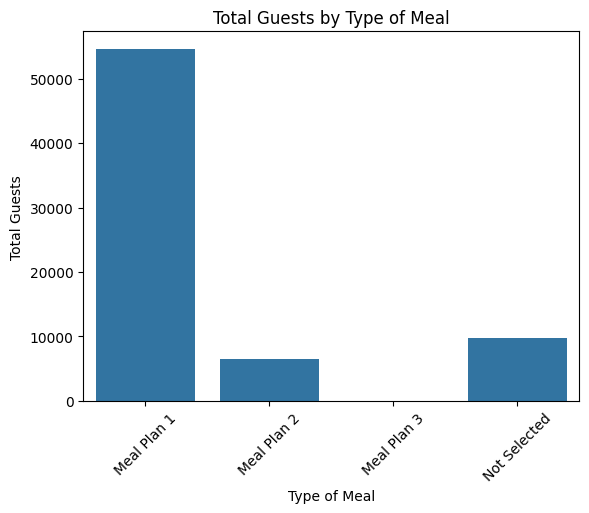

In [34]:
meal = df.groupby(['type of meal'])['total_guest'].sum().reset_index()
display(meal)
sns.barplot(x='type of meal', y='total_guest', data=meal)
plt.title("Total Guests by Type of Meal")
plt.xlabel("Type of Meal")
plt.ylabel("Total Guests")
plt.xticks(rotation=45)
plt.show()

In [35]:
print(df['lead time'].min())
print(df['lead time'].max())

0
443


booking_window_category
Short-term    27704
Mid-term       6159
Long-term      1125
Name: count, dtype: int64

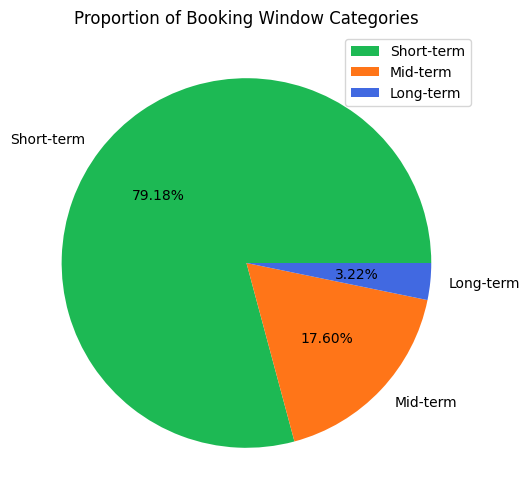

In [36]:
bins = [0,150,300,450]
labels = ['Short-term', 'Mid-term', 'Long-term']
df['booking_window_category'] = pd.cut(df['lead time'], bins=bins, labels=labels)
book_cat=df['booking_window_category'].value_counts()
display(book_cat)
plt.figure(figsize=(6,6))
plt.pie(book_cat.values, labels=book_cat.index, autopct='%1.2f%%', colors=['#1DB954','#FF7518','#4169E1'])
plt.title("Proportion of Booking Window Categories")
plt.legend(['Short-term', 'Mid-term', 'Long-term'])
plt.show()

In [37]:
le_cols = ['booking_window_category', 'booking status']
le_dict = {}
for col in le_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [38]:
df.drop(columns={'P-not-C','lead time'},inplace=True)

Months sorted by cancellation rate:
reservation_month
January       990
February     1244
March        1658
April        1741
May          1650
June         1912
July         1607
August       2325
September    3073
October      3440
November     2106
December     2620
Name: booking status, dtype: int64


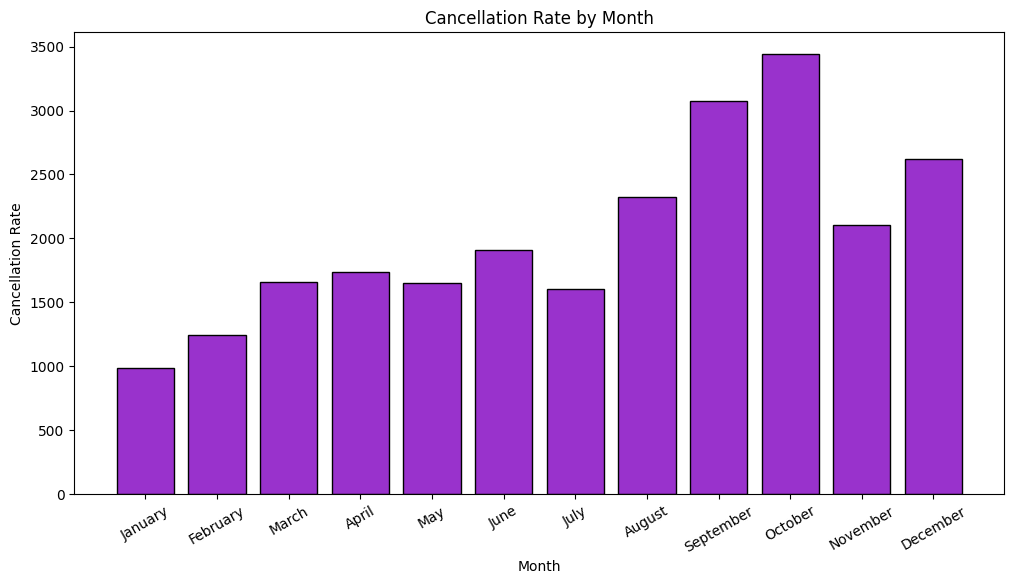

In [39]:
df['reservation_month'] = df['date of reservation'].dt.month_name()
monthly_cancellation = df.groupby('reservation_month')['booking status'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_cancellation = monthly_cancellation.reindex(month_order)
print("Months sorted by cancellation rate:")
print(monthly_cancellation)

plt.figure(figsize=(12,6))
plt.bar(monthly_cancellation.index, monthly_cancellation.values,color='darkorchid',edgecolor='black')
plt.title("Cancellation Rate by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=30)
plt.show()

C:\Users\kanik\AppData\Local\Temp\ipykernel_1172\671499330.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sum = df[df['room type'] == room].groupby('reservation_month')['total_guest'].sum()


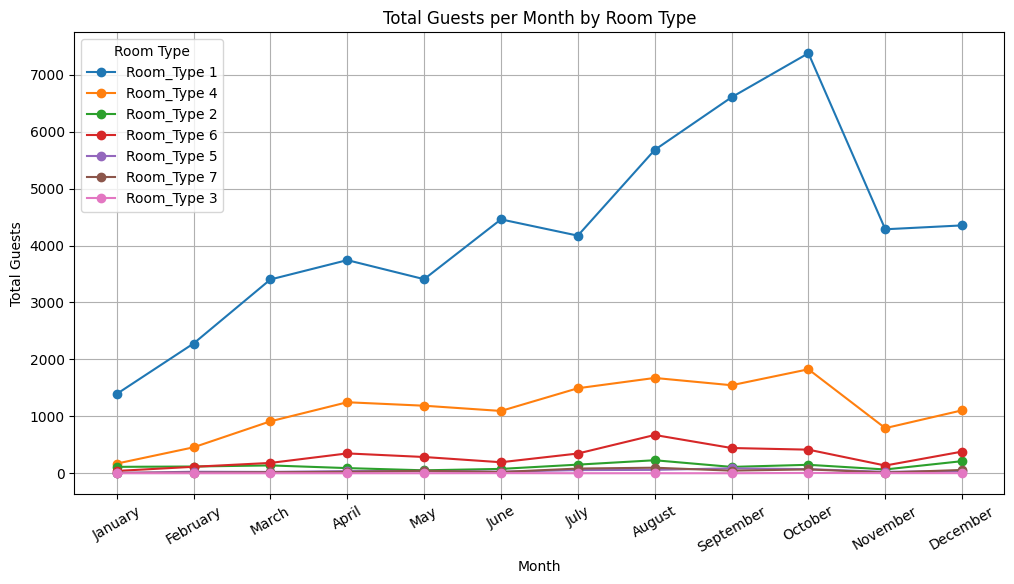

In [40]:
df['reservation_month'] = pd.Categorical(df['reservation_month'], categories=month_order, ordered=True)
plt.figure(figsize=(12,6))
for room in df['room type'].unique():
    monthly_sum = df[df['room type'] == room].groupby('reservation_month')['total_guest'].sum()
    plt.plot(monthly_sum.index, monthly_sum.values, marker='o', label=room)
plt.title("Total Guests per Month by Room Type")
plt.xlabel("Month")
plt.ylabel("Total Guests")
plt.xticks(rotation=30)
plt.legend(title="Room Type")
plt.grid(True)
plt.show()

market segment type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.633628
Online           112.252311
Name: average price, dtype: float64


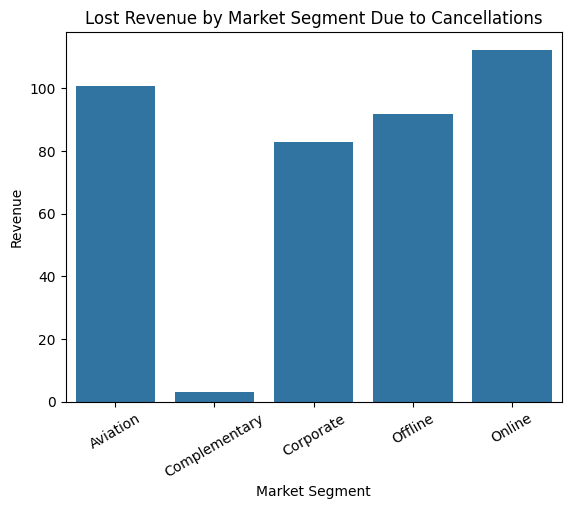

In [41]:
revenue_segment = df.groupby('market segment type')['average price'].mean()
print(revenue_segment)
sns.barplot(x=revenue_segment.index, y=revenue_segment.values)
plt.title("Lost Revenue by Market Segment Due to Cancellations")
plt.xlabel("Market Segment")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.show()

In [42]:
categorical_cols = ['type of meal', 'room type', 'market segment type']
categorical_cols = [col for col in categorical_cols if col in df.columns]
df = pd.get_dummies(df, columns=categorical_cols)

In [43]:
df['booking_window_category'].value_counts()

booking_window_category
2    27704
1     6159
3     1297
0     1125
Name: count, dtype: int64

In [44]:
df.head()

,Booking_ID,number of adults,number of children,car parking space,repeated,P-C,average price,special requests,date of reservation,booking status,...,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,INN00001,1,1,0,0,0,88.00,0,2015-10-02,1,...,False,False,False,False,False,False,False,False,True,False
1,INN00002,1,0,0,0,0,106.68,1,2018-11-06,1,...,False,False,False,False,False,False,False,False,False,True
2,INN00003,2,1,0,0,0,50.00,0,2018-02-28,0,...,False,False,False,False,False,False,False,False,False,True
3,INN00004,1,0,0,0,0,100.00,1,2017-05-20,0,...,False,False,False,False,False,False,False,False,False,True
4,INN00005,1,0,0,0,0,77.00,0,2018-04-11,0,...,False,False,False,False,False,False,False,False,False,True


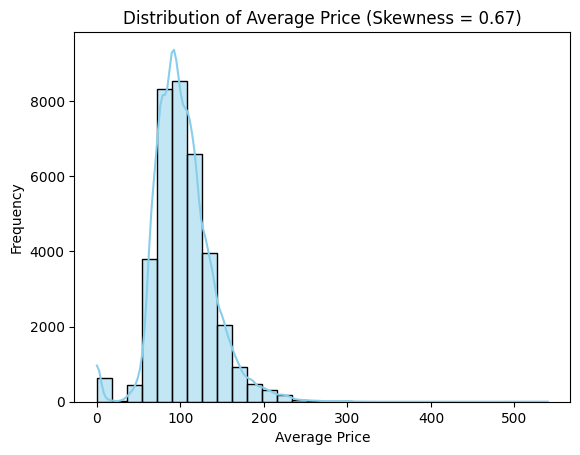

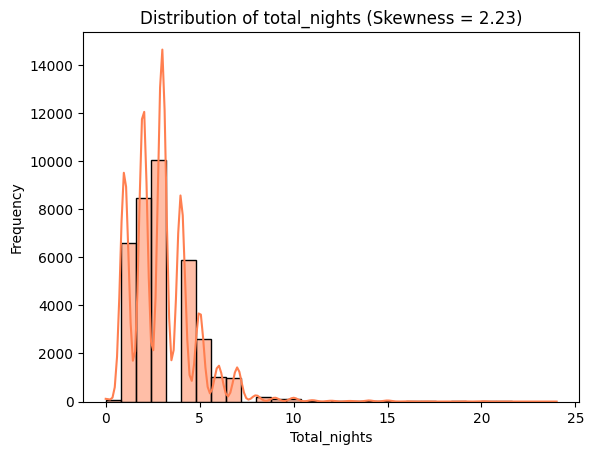

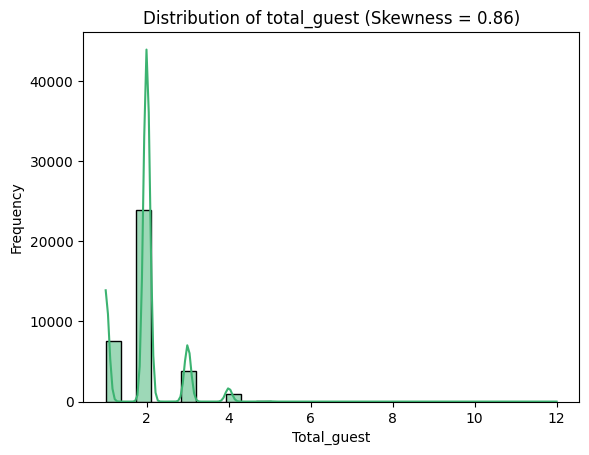

In [45]:
skew_value1 = df['average price'].skew()
skew_value2 = df['total_nights'].skew()
skew_value3 = df['total_guest'].skew()

sns.histplot(df['average price'], bins=30, kde=True, color='skyblue')
plt.title(f"Distribution of Average Price (Skewness = {skew_value1:.2f})")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['total_nights'], bins=30, kde=True, color='coral')
plt.title(f"Distribution of total_nights (Skewness = {skew_value2:.2f})")
plt.xlabel("Total_nights")
plt.ylabel("Frequency")
plt.show()

sns.histplot(df['total_guest'], bins=30, kde=True, color='mediumseagreen')
plt.title(f"Distribution of total_guest (Skewness = {skew_value3:.2f})")
plt.xlabel("Total_guest")
plt.ylabel("Frequency")
plt.show()



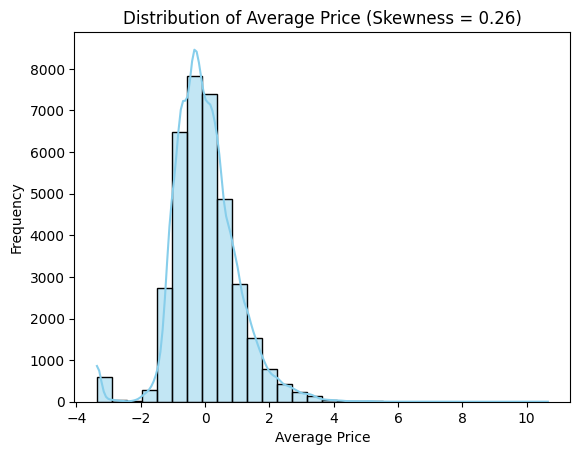

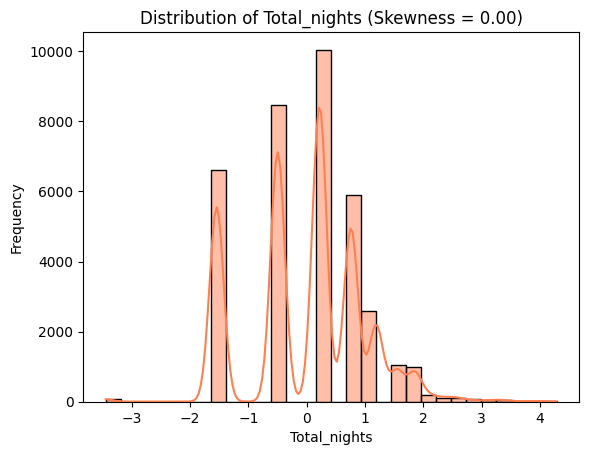

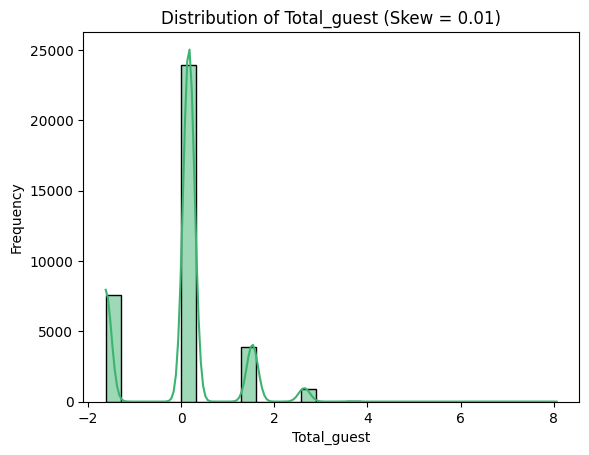

In [46]:
cols_to_transform = ['average price', 'total_guest', 'total_nights']
pt = PowerTransformer(method='yeo-johnson')
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])

skew_pt1 = df['average price'].skew()
sns.histplot(df['average price'], bins=30, kde=True, color='skyblue')
plt.title(f"Distribution of Average Price (Skewness = {skew_pt1:.2f})")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()
skew_pt2 = df['total_nights'].skew()
sns.histplot(df['total_nights'], bins=30, kde=True, color='coral')
plt.title(f"Distribution of Total_nights (Skewness = {skew_pt2:.2f})")
plt.xlabel("Total_nights")
plt.ylabel("Frequency")
plt.show()
skew_after3 = df['total_guest'].skew()
sns.histplot(df['total_guest'], bins=30, kde=True, color='mediumseagreen')
plt.title(f"Distribution of Total_guest (Skew = {skew_after3:.2f})")
plt.xlabel("Total_guest")
plt.ylabel("Frequency")
plt.show()

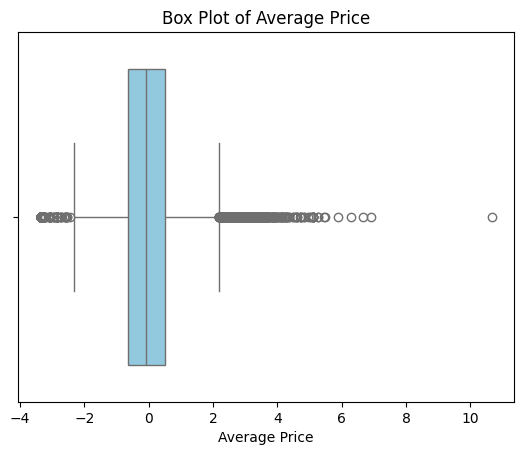

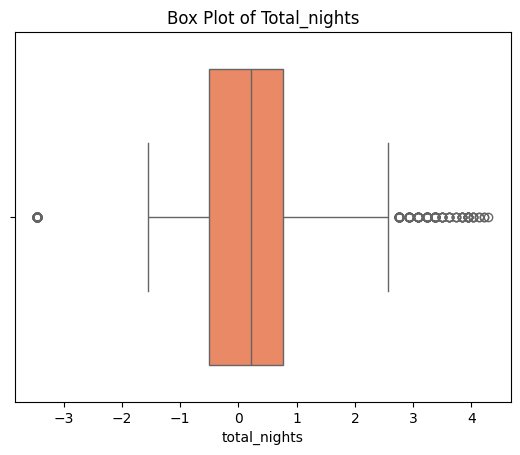

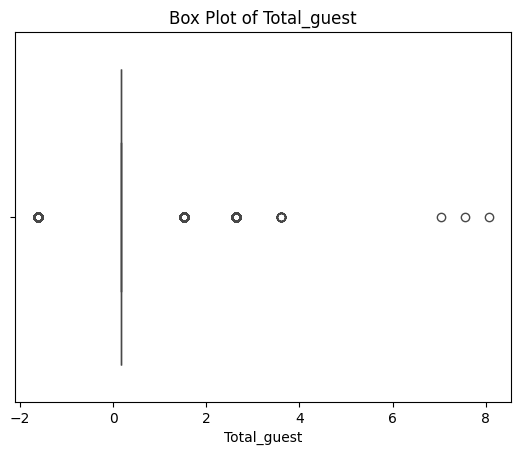

In [47]:
sns.boxplot(x=df['average price'], color='skyblue')
plt.title("Box Plot of Average Price")
plt.xlabel("Average Price")
plt.show()
sns.boxplot(x=df['total_nights'], color='coral')
plt.title("Box Plot of Total_nights")
plt.xlabel("total_nights")
plt.show()
sns.boxplot(x=df['total_guest'], color='mediumseagreen')
plt.title("Box Plot of Total_guest")
plt.xlabel("Total_guest")
plt.show()

average price: 1606 outliers capped.


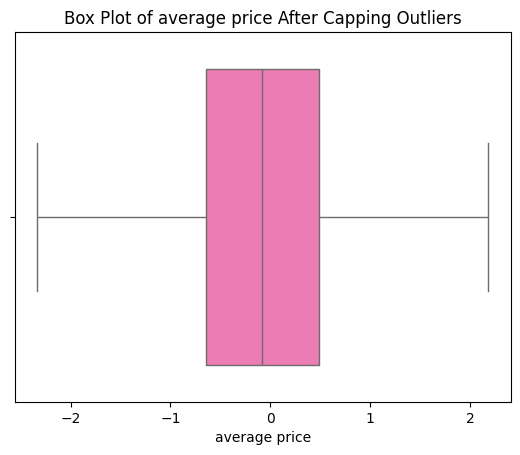

total_guest: 12339 outliers capped.


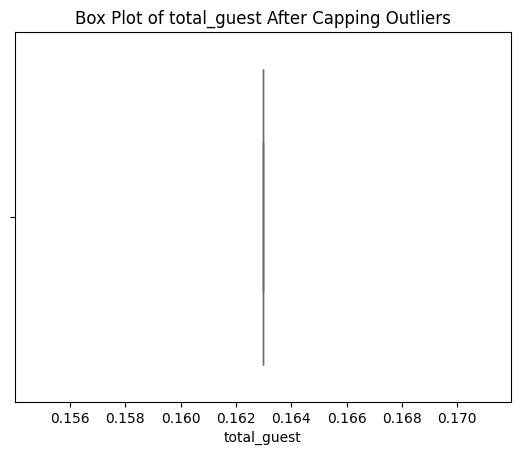

total_nights: 262 outliers capped.


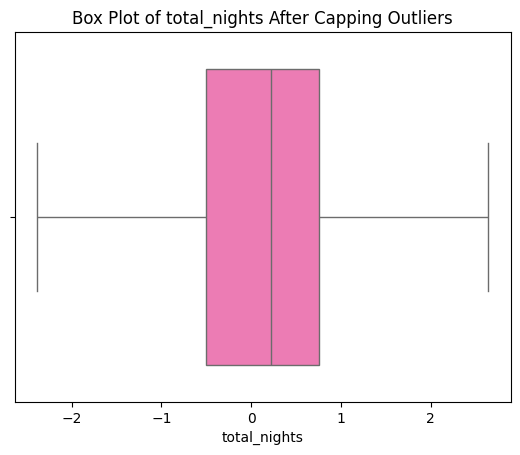

In [48]:
cols_to_cap = ['average price','total_guest','total_nights']
for col in cols_to_cap:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers capped.")
    df[col] = df[col].clip(lower, upper)
    sns.boxplot(x=df[col], color='hotpink')
    plt.title(f"Box Plot of {col} After Capping Outliers")
    plt.show()

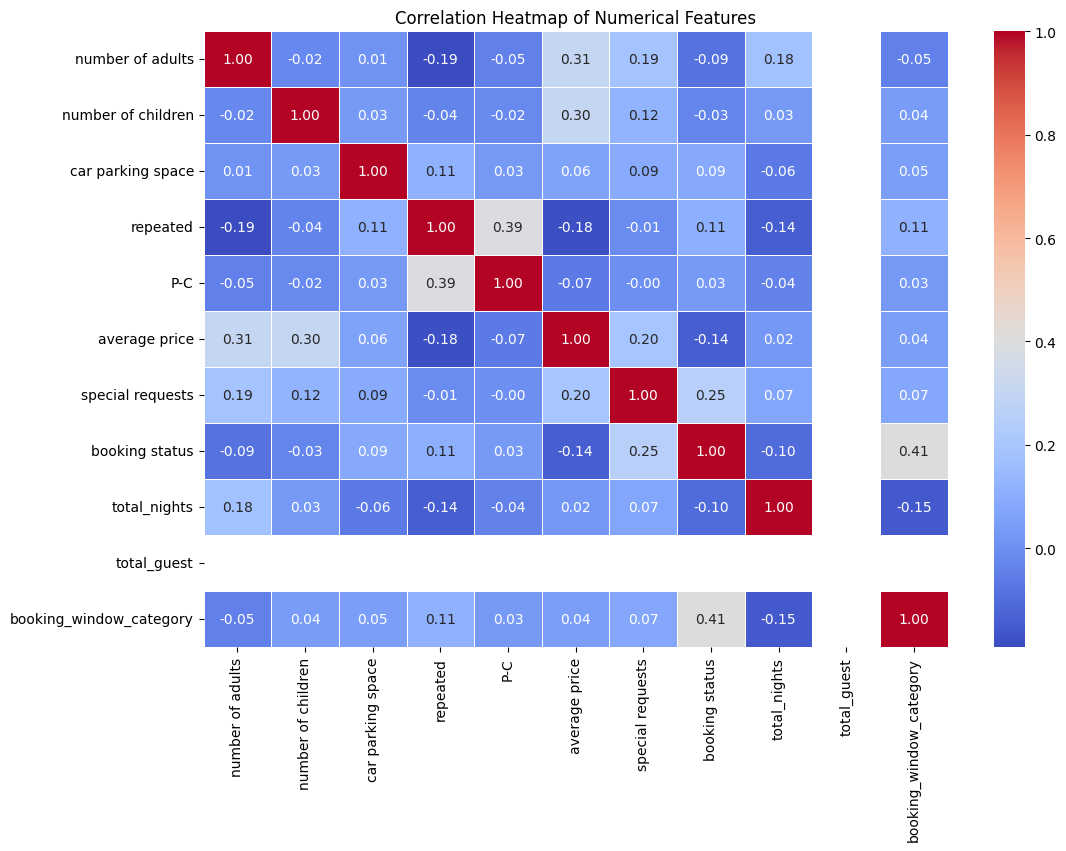

In [49]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_cols.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [50]:
features = ['total_guest','car parking space', 'repeated', 'P-C','average price', 'special requests','total_nights', 
            'booking_window_category'] + [col for col in df.columns if 'type of meal' in col or 
                                         'room type' in col or 
                                         'market segment type' in col]

X = df[features]
y = df['booking status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("Original class distribution:\n", pd.Series(y_train).value_counts())
print("After SMOTE:\n", pd.Series(y_res).value_counts())

Original class distribution:
 booking status
1    19517
0     9511
Name: count, dtype: int64
After SMOTE:
 booking status
1    19517
0    19517
Name: count, dtype: int64


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve,confusion_matrix,balanced_accuracy_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_res)
y_pred = lr.predict(X_test_scaled)
y_pred_prob=lr.predict_proba(X_test_scaled)[:,1]

In [54]:
acc_lr=accuracy_score(y_test, y_pred)
pre_lr=precision_score(y_test, y_pred)
rec_lr=recall_score(y_test, y_pred)
f1_lr=f1_score(y_test, y_pred)
roc_lr=roc_auc_score(y_test,y_pred_prob )
con_lr=confusion_matrix(y_test, y_pred)
print("Accuracy:", acc_lr)
print("Precision:", pre_lr)
print("Recall:", rec_lr)
print("F1-score:",f1_lr )
print("ROC-AUC:", roc_lr)
print("Confusion Matrix:")
print(con_lr)

Accuracy: 0.78021220890175
Precision: 0.869986480396575
Recall: 0.7913506866161099
F1-score: 0.8288075560802833
ROC-AUC: 0.8515252456805406
Confusion Matrix:
[[1801  577]
 [1018 3861]]


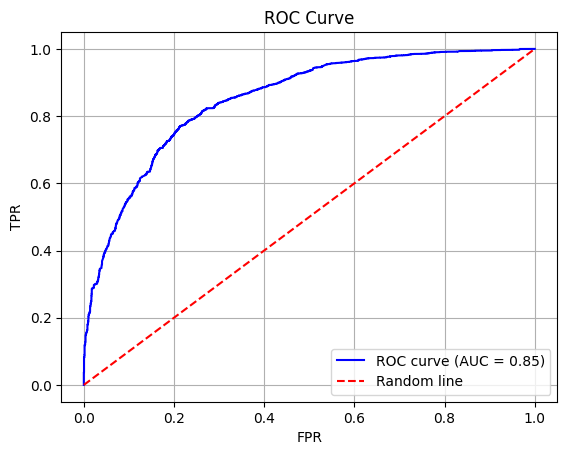

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_lr:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--',label='Random line') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5,n_jobs=-1)
grid.fit(X_train_scaled, y_res)
best_k = grid.best_params_['n_neighbors']
print("Best K:", best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_res)
y_pred = knn.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]

Best K: 6


In [57]:
acc_knn=accuracy_score(y_test, y_pred)
pre_knn=precision_score(y_test, y_pred)
rec_knn=recall_score(y_test, y_pred)
f1_knn=f1_score(y_test, y_pred)
roc_knn=roc_auc_score(y_test,y_pred_prob)
con_knn=confusion_matrix(y_test, y_pred)
print("Accuracy:", acc_knn)
print("Precision:", pre_knn)
print("Recall:", rec_knn)
print("F1-score:",f1_knn )
print("ROC-AUC:", roc_knn)
print("Confusion Matrix:")
print(con_knn)

Accuracy: 0.8154884938679895
Precision: 0.8970390309555855
Recall: 0.8196351711416274
F1-score: 0.8565920531219878
ROC-AUC: 0.8871218819226803
Confusion Matrix:
[[1919  459]
 [ 880 3999]]


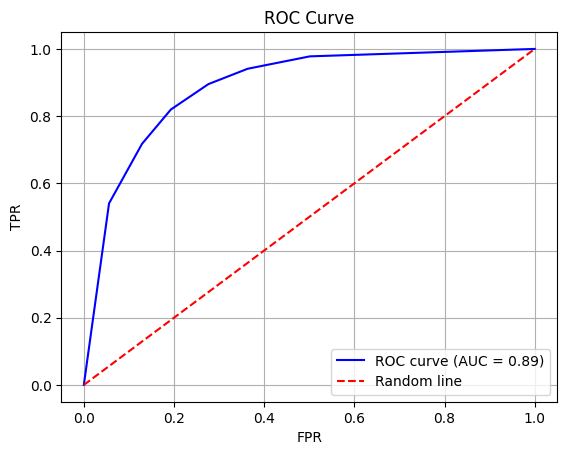

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_knn:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--',label='Random line') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_res)
y_pred = svm_model.predict(X_test_scaled)
y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

In [60]:
acc_svm=accuracy_score(y_test, y_pred)
pre_svm=precision_score(y_test, y_pred)
rec_svm=recall_score(y_test, y_pred)
f1_svm=f1_score(y_test, y_pred)
roc_svm=roc_auc_score(y_test,y_pred_prob)
con_svm=confusion_matrix(y_test, y_pred)
print("Accuracy:", acc_svm)
print("Precision:", pre_svm)
print("Recall:", rec_svm)
print("F1-score:",f1_svm )
print("ROC-AUC:", roc_svm)
print("Confusion Matrix:")
print(con_svm)

Accuracy: 0.7941298057048367
Precision: 0.8730438615825435
Recall: 0.8118466898954704
F1-score: 0.8413338997451147
ROC-AUC: 0.8602954320459234
Confusion Matrix:
[[1802  576]
 [ 918 3961]]


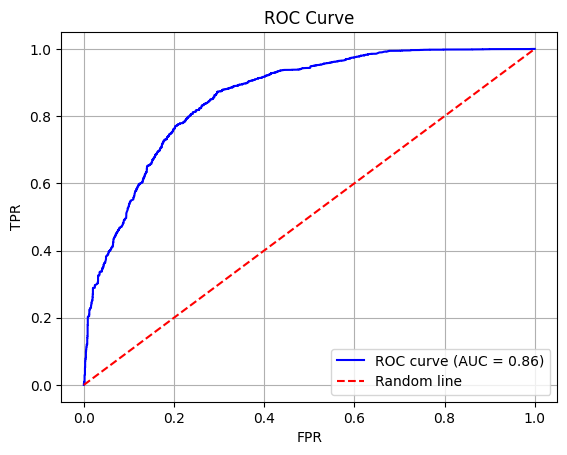

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_svm:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--',label='Random line') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(class_weight='balanced', max_depth=15, random_state=42)
dt_model.fit(X_train_scaled, y_res)
y_pred = dt_model.predict(X_test_scaled)
y_pred_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

In [63]:
acc_dt=accuracy_score(y_test, y_pred)
pre_dt=precision_score(y_test, y_pred)
rec_dt=recall_score(y_test, y_pred)
f1_dt=f1_score(y_test, y_pred)
roc_dt=roc_auc_score(y_test,y_pred_prob)
con_dt=confusion_matrix(y_test, y_pred)
print("Accuracy:", acc_dt)
print("Precision:", pre_dt)
print("Recall:", rec_dt)
print("F1-score:",f1_dt)
print("ROC-AUC:", roc_dt)
print("Confusion Matrix:")
print(con_dt)

Accuracy: 0.8302328785999724
Precision: 0.8977099236641222
Recall: 0.8436154949784792
F1-score: 0.8698224852071006
ROC-AUC: 0.8895473141358125
Confusion Matrix:
[[1909  469]
 [ 763 4116]]


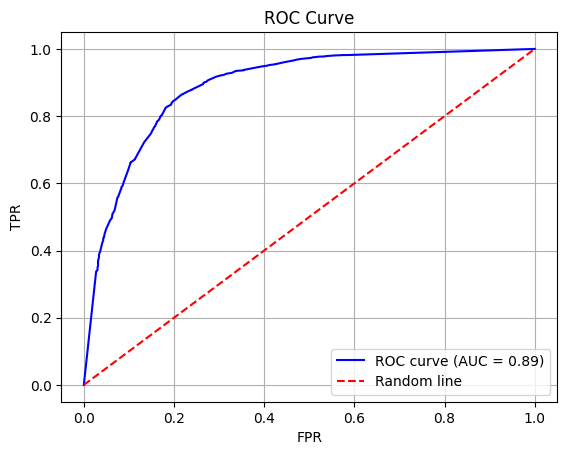

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_dt:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--',label='Random line') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
from sklearn.naive_bayes import GaussianNB
num_features=['total_nights','total_guest','average price']
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]
nb_model = GaussianNB()
nb_model.fit(X_train_num, y_train)
y_pred = nb_model.predict(X_test_num)
y_pred_prob = nb_model.predict_proba(X_test_num)[:, 1]

In [66]:
acc_nb=accuracy_score(y_test, y_pred)
pre_nb=precision_score(y_test, y_pred)
rec_nb=recall_score(y_test, y_pred)
f1_nb=f1_score(y_test, y_pred)
roc_nb=roc_auc_score(y_test,y_pred_prob)
con_nb=confusion_matrix(y_test, y_pred)
print("Accuracy:", acc_nb)
print("Precision:", pre_nb)
print("Recall:", rec_nb)
print("F1-score:",f1_nb)
print("ROC-AUC:", roc_nb)
print("Confusion Matrix:")
print(con_nb)

Accuracy: 0.672316384180791
Precision: 0.672316384180791
Recall: 1.0
F1-score: 0.8040540540540541
ROC-AUC: 0.6345284652251432
Confusion Matrix:
[[   0 2378]
 [   0 4879]]


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

rf = RandomForestClassifier(random_state=42, class_weight='balanced_subsample', oob_score=True,n_jobs=-1)
param_dist = {
    'n_estimators': [500,1000,1200,1500],
    'max_depth': [20,30,40,None],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1,2,3],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                
    cv=cv,
    scoring='roc_auc',         
    n_jobs=-1,
    verbose=2,
    random_state=42
)
random_search.fit(X_train_scaled, y_res)
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best CV ROC AUC:", random_search.best_score_)
y_prob = best_rf.predict_proba(X_test_scaled)[:, 1]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 1500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}
Best CV ROC AUC: 0.9299487614928299


In [68]:
thresholds = np.arange(0.1, 0.9, 0.01)
best_acc = 0
best_thresh = 0.5
best_metrics_rf = {}
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_t)
    if acc > best_acc:
        best_acc = acc
        best_thresh = t
        best_metrics_rf = {
            'acc_rf': acc,
            'pre_rf': precision_score(y_test, y_pred_t),
            'rec_rf': recall_score(y_test, y_pred_t),
            'f1_rf': f1_score(y_test, y_pred_t),
            'roc_rf': roc_auc_score(y_test, y_prob),
            'con_rf': confusion_matrix(y_test, y_pred_t)
        }

print(f"Best Threshold: {best_thresh:.2f}")
print(f"Accuracy:{best_metrics_rf['acc_rf']:.4f}")
print(f"Precision:{best_metrics_rf['pre_rf']:.4f}")
print(f"Recall:{best_metrics_rf['rec_rf']:.4f}")
print(f"F1-score:{best_metrics_rf['f1_rf']:.4f}")
print(f"ROC-AUC:{best_metrics_rf['roc_rf']:.4f}")
print("Confusion Matrix:")
print(best_metrics_rf['con_rf'])

Best Threshold: 0.33
Accuracy:0.8612
Precision:0.8755
Recall:0.9252
F1-score:0.8997
ROC-AUC:0.9159
Confusion Matrix:
[[1736  642]
 [ 365 4514]]


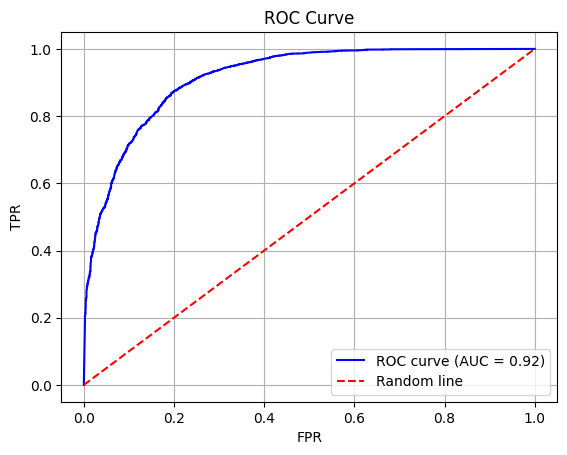

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc=roc_auc_score(y_test,y_prob )
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--',label='Random line') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5],
    'estimator__max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=ada,param_grid=param_grid,cv=5,scoring='roc_auc',n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled, y_res)

print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)[:, 1]

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 0.5, 'n_estimators': 500}
Best CV ROC-AUC: 0.8901165997660948


In [71]:
acc_ada=accuracy_score(y_test, y_pred)
pre_ada=precision_score(y_test, y_pred)
rec_ada=recall_score(y_test, y_pred)
f1_ada=f1_score(y_test, y_pred)
roc_ada=roc_auc_score(y_test,y_pred_prob )
con_ada=confusion_matrix(y_test, y_pred)
print("Accuracy:", acc_ada)
print("Precision:", pre_ada)
print("Recall:", rec_ada)
print("F1-score:",f1_ada )
print("ROC-AUC:", roc_ada)
print("Confusion Matrix:")
print(con_ada)

Accuracy: 0.8194846355243214
Precision: 0.8786335667303203
Recall: 0.8487394957983193
F1-score: 0.8634278565471226
ROC-AUC: 0.8871218819226803
Confusion Matrix:
[[1806  572]
 [ 738 4141]]


In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    tree_method='hist',
    random_state=42
)
param_grid = {
    'n_estimators': [1000,1200,1500,2000],
    'max_depth': [5, 6, 8],
    'learning_rate': [0.005, 0.01, 0.02, 0.03],
    'subsample': [0.8,0.9,1],
    'colsample_bytree': [0.7,0.8,1],
    'min_child_weight': [1,3,5],
    'gamma': [0,0.1,0.2],
    'scale_pos_weight': [1, 0.48]  
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,       
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_scaled, y_res)
best_xgb = random_search.best_estimator_
print("Best Params:", random_search.best_params_)
print("Best ROC-CV AUC:", random_search.best_score_)
y_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.8}
Best ROC-CV AUC: 0.9251676003390521


In [73]:
thresholds = np.arange(0.1, 0.9, 0.01)
best_acc = 0
best_thresh = 0.5
best_metrics_xg = {}

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    acc = accuracy_score(y_test, y_pred_t)
    
    if acc > best_acc:
        best_acc = acc
        best_thresh = t
        best_metrics_xg = {
            'acc_xg': acc,
            'pre_xg': precision_score(y_test, y_pred_t),
            'rec_xg': recall_score(y_test, y_pred_t),
            'f1_xg': f1_score(y_test, y_pred_t),
            'roc_xg': roc_auc_score(y_test, y_prob),
            'con_xg': confusion_matrix(y_test, y_pred_t)
        }

print(f"Best Threshold: {best_thresh:.2f}")
print(f"Accuracy:{best_metrics_xg['acc_xg']:.4f}")
print(f"Precision:{best_metrics_xg['pre_xg']:.4f}")
print(f"Recall:{best_metrics_xg['rec_xg']:.4f}")
print(f"F1-score:{best_metrics_xg['f1_xg']:.4f}")
print(f"ROC-AUC:{best_metrics_xg['roc_xg']:.4f}")
print("Confusion Matrix:")
print(best_metrics_xg['con_xg'])

Best Threshold: 0.32
Accuracy:0.8621
Precision:0.8727
Recall:0.9305
F1-score:0.9007
ROC-AUC:0.9176
Confusion Matrix:
[[1716  662]
 [ 339 4540]]


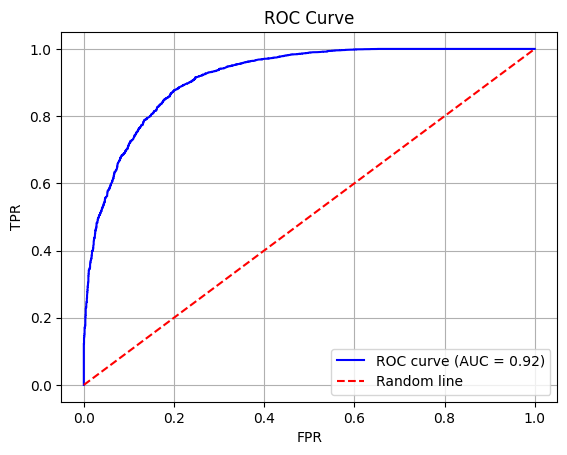

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc=roc_auc_score(y_test,y_prob )
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--',label='Random line') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
print(f"{'Metric':<12} {'Logistic_Regression':<22} {'KNN':<10} {'SVM':<10} {'Decision_Tree':<15} {'Naive Bayes':<15} {'Random Forest':<15} {'AdaBoost':<10} {'XGBoost':<10}")
print(f"{'Accuracy':<12} {acc_lr:<22.2f} {acc_knn:<10.2f} {acc_svm:<10.2f} {acc_dt:<15.2f} {acc_nb:<15.2f} {best_metrics_rf['acc_rf']:<15.2f} {acc_ada:<10.2f} {best_metrics_xg['acc_xg']:<10.2f}")
print(f"{'Precision':<12} {pre_lr:<22.2f} {pre_knn:<10.2f} {pre_svm:<10.2f} {pre_dt:<15.2f} {pre_nb:<15.2f} {best_metrics_rf['pre_rf']:<15.2f} {pre_ada:<10.2f} {best_metrics_xg['pre_xg']:<10.2f}")
print(f"{'Recall':<12} {rec_lr:<22.2f} {rec_knn:<10.2f} {rec_svm:<10.2f} {rec_dt:<15.2f} {rec_nb:<15.2f} {best_metrics_rf['rec_rf']:<15.2f} {rec_ada:<10.2f} {best_metrics_xg['rec_xg']:<10.2f}")
print(f"{'F1 Score':<12} {f1_lr:<22.2f} {f1_knn:<10.2f} {f1_svm:<10.2f} {f1_dt:<15.2f} {f1_nb:<15.2f} {best_metrics_rf['f1_rf']:<15.2f} {f1_ada:<10.2f} {best_metrics_xg['f1_xg']:<10.2f}")
print(f"{'ROC-AUC':<12} {roc_lr:<22.2f} {roc_knn:<10.2f} {roc_svm:<10.2f} {roc_dt:<15.2f} {roc_nb:<15.2f} {best_metrics_rf['roc_rf']:<15.2f} {roc_ada:<10.2f} {best_metrics_xg['roc_xg']:<10.2f}")

Metric       Logistic_Regression    KNN        SVM        Decision_Tree   Naive Bayes     Random Forest   AdaBoost   XGBoost   
Accuracy     0.78                   0.82       0.79       0.83            0.67            0.86            0.82       0.86      
Precision    0.87                   0.90       0.87       0.90            0.67            0.88            0.88       0.87      
Recall       0.79                   0.82       0.81       0.84            1.00            0.93            0.85       0.93      
F1 Score     0.83                   0.86       0.84       0.87            0.80            0.90            0.86       0.90      
ROC-AUC      0.85                   0.89       0.86       0.89            0.63            0.92            0.89       0.92      


In [84]:
import pickle as pkl

with open("scaler.pkl", "wb") as f:
    pkl.dump(scaler, f)
with open("power_transformer.pkl", "wb") as f:
    pkl.dump(pt, f)
with open("label_encoders.pkl", "wb") as f:
    pkl.dump(le_dict, f)
with open("data_columns.pkl", "wb") as f:
    pkl.dump(list(X.columns), f)
with open("model_xgb.pkl", "wb") as f:
    pkl.dump(best_xgb, f)
with open("model_rf.pkl", "wb") as f:
    pkl.dump(best_rf,f)